# matplotlib II

In [2]:
import matplotlib.pyplot as plt

## kurzer Exkurs: numpy
* einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays
* effizient implementierte Funktionen für numerische Berechnungen
* https://numpy.org/

Wir nutzen numpy lediglich um unaufwändig Beispieldaten für die Graphen zu generieren.

`numpy.linspace(start, stop, num=50, ...)`: Gibt gleichmäßig verteilte Werte über ein Intervall zurück

Installieren mit conda:
`conda install numpy`

(Doku: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

In [6]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [7]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [8]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Funktionale Graphen

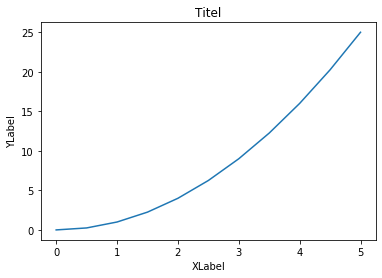

In [11]:
plt.plot(x, y)
plt.xlabel('XLabel')
plt.ylabel('YLabel')
plt.title('Titel')
plt.show()

### Mehrere Plots in Einem
`pyplot.subplot(nrows, ncols, index)`

* `nrows`: Anzahl der Zeilen
* `ncols`: Anzahl der Spalten
* `index`: Plot auf das sich bezogen wird

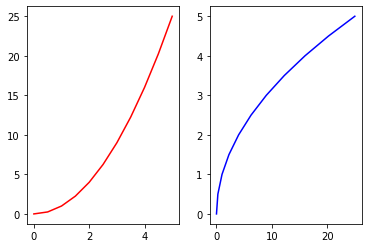

In [19]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'b')

## Objektorientierte Graphen
Graphen werden als Objekt gespeichert und sind dadurch einfacher und flexibler in der Handhabung.

(Doku figures: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html)

Text(0.5, 1.0, 'Titel')

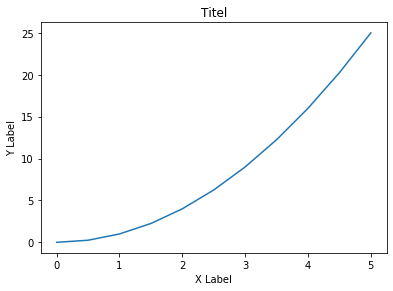

In [29]:
# neue Figure erschaffen
fig = plt.figure()

# neuen Graphen hinzufügen
# pyplot.add_axes([left, bottom, width, height])
# Zahlen in Relation zur 'Leinwand'
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Graphen plotten
axes.plot(x, y)

# Labels setzen
axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_title('Titel')

### Mehrere Graphen ineinander

Text(0.5, 1.0, 'kleiner plot')

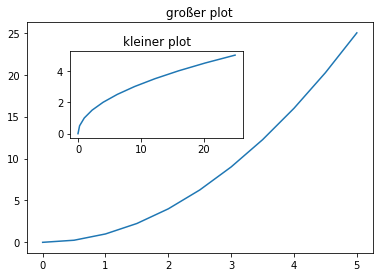

In [31]:
fig = plt.figure()

# graphen (und positionen) erstellen
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# ersten graphen plotten
axes1.plot(x, y)
axes1.set_title('großer plot')

# zweiten graphen plotten
axes2.plot(y, x)
axes2.set_title('kleiner plot')

### Subplots
Mit `pyplot.subplots()` können mehrere Plots in eine Leinwand gezeichnet werden. Argumente sind u.A. 
* `nrows`: Anzahl der Zeilen
* `ncols`: Anzahl der Spalten

`subplots()` gibt ein Tuple mit der figure und den axes zurück.

Doku: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html?#matplotlib.figure.Figure.subplots

Text(0.5, 1.0, 'zweiter Graph')

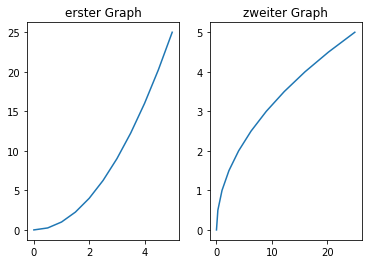

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# erster Graph
axes[0].plot(x, y)
axes[0].set_title('erster Graph')

# zweiter Graph
axes[1].plot(y, x)
axes[1].set_title('zweiter Graph')

### Leinwandgröße und dpi ändern
`plt.figure` nimmt Argumente:
* `figsize=(width, height)`: Breite bzw. Höhe in Inch, Standard bei `(6.4, 4.8)`
* `dpi=100.0`: Auflösung

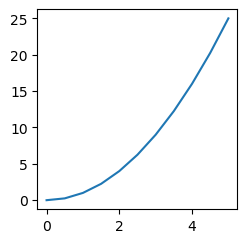

In [39]:
fig = plt.figure(figsize=(2,2), dpi=100)

# Graph hinzufügen
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)

### Überschneidungen von Graphen auflösen
`pyplot.tight_layout()` löst Überschneidungen auf

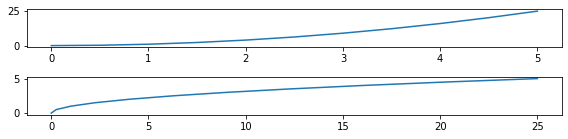

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,2))

axes[0].plot(x, y)
axes[1].plot(y, x)

plt.tight_layout()

## Graphen speichern

`figure.savefig(filename, dpi=None)` speichert Graphen
* `filename`: Dateiname, Format wird aus der Dateiendung generiert, Standard `png`
* `dpi=None`: Auflösung des Graphen. Falls nicht angegeben wird die der Figure genutzt.

Doku: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html?#matplotlib.figure.Figure.savefig

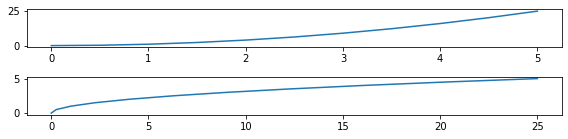

In [47]:
# Leinwand und Graphen erstellen
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,2))

# Graphen plotten
axes[0].plot(x, y)
axes[1].plot(y, x)

# Layout anpassen
plt.tight_layout()

# speichern
fig.savefig('figure.png', dpi=200)

## Mehrere Linien in einem Graphen

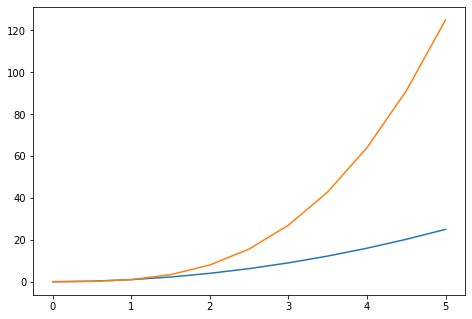

In [48]:
# Leinwand erstellen
fig = plt.figure()

# Graph erstellen
ax = fig.add_axes([0,0,1,1])

# erste Linie zeichnen
ax.plot(x, y)

# zweite Linie zeichnen
ax.plot(x, x**3)

### Legende erstellen

Doku: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html?#matplotlib.pyplot.legend
(unter parameter -> loc sind alle vordefinierten Positionen aufgelistet

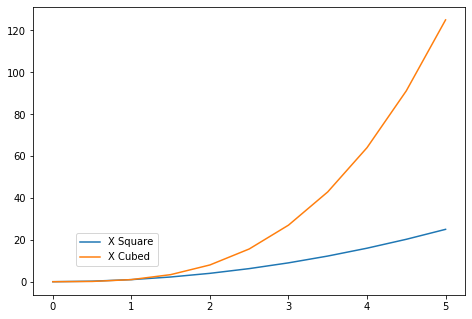

In [53]:
# Leinwand erstellen
fig = plt.figure()
# Graphen erstellen
ax = fig.add_axes([0,0,1,1])

# beide Linien zeichnen
ax.plot(x, x**2, label='X Square')
ax.plot(x, x**3, label='X Cubed')

# Legende erstellen
ax.legend(loc=(0.1,0.1))
# loc: Position, entweder absolut oder vorgefertigte Positionen: 
#   z.B. 'best','upper-right', 'center', center-left'

## Erscheinungsbild
Das Erscheinungsbild der Graphen kann natürlich auch angepasst werden.

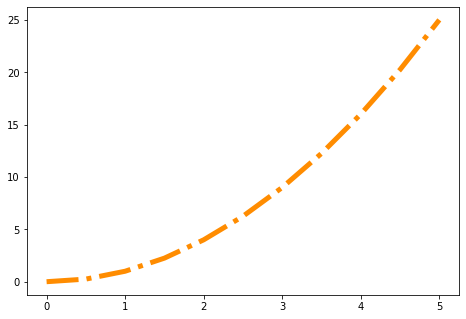

In [60]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

# color: red, blue, ... or RGB hex code
# linewidht (lw): default1
# linestyle (ls): '-' '--' dashed, '-.', ':','steps'
# alpha: Transparenz
ax.plot(x, y, 
        color='#FF8C00',
        lw='5',
        ls='-.'
       )

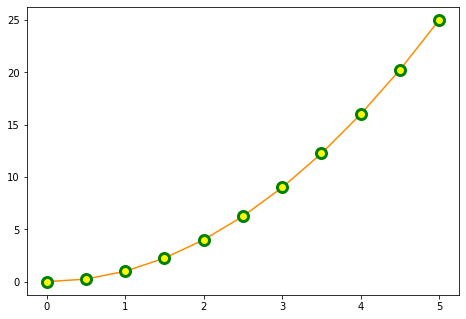

In [61]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

# color: red, blue, ... or RGB hex code
# linewidht (lw): default1
# linestyle (ls): '-' '--' dashed, '-.', ':','steps'
# alpha: Transparenz
ax.plot(x, y, 
        color='#FF8C00',
        marker='o',                # Typ der Marker (z.B: x, 1, +, o)
        markersize=10,             # Größe der Marker
        markerfacecolor='yellow',  # Grundfarbe der Marker
        markeredgewidth=3,         # Breite der Umrandung der Marker 
        markeredgecolor='green'    # Farbe der Umrandung der Marker
       )

## Zoom
Mit `set_xlim()` bzw. `set_xlim()` kann man bestimmte Bereiche aus dem Graphen anzeigen.

(-10, 20)

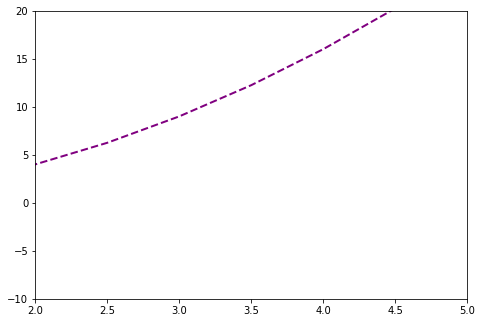

In [68]:
# Leinwand erstellen
fig = plt.figure()
# Graphen erstellen
ax = fig.add_axes([0,0,1,1])
# Graphen plotten
ax.plot(x, y, color='purple', lw=2, ls='--')

# Fenster wählen
ax.set_xlim([2, 5])
ax.set_ylim([-10, 20])